## Capstone Two - Final Project Report


### The Data Science Method

1. Problem Identification

2. Data Wrangling

3. Exploratory Data Analysis

4.   Pre-processing and Training Data Development

5.  Modeling - Steps 8 - 10 below.

## Step 1
### Start by loading the necessary packages.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# load cleaned dataset
df = pd.read_csv(r'C:\Users\yanks\Desktop\Springboard\Unit 27\cleaned_TelecomCxChurn.csv')

## Step 2
### Explore and Inspect the Data.

In [2]:
# Inspect the data
print(df.info())
print(df.describe())
print(df.columns)

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 2: Explore and Inspect the Data
- Use `.info()` to inspect data types and missing values.
- Use `.describe()` to check summary statistics for numeric columns.
- Use `.columns` to get an overview of column names.
- Use `.isnull().sum()` to identify any remaining missing values that need handling.

## Step 3
### Handle Missing Values.

In [3]:
from sklearn.impute import SimpleImputer

# Define numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Verify there are no missing values remaining
print(df[numeric_columns].isnull().sum())

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


### Step 3: Handle Missing Values
- Use `SimpleImputer` to handle missing values in numeric columns.
- Strategy: Replace missing values with the column mean.
- Verify no missing values remain after imputation.

## Step 4 
### Create Dummy Features.

In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


### Step 4: Create Dummy Features
- Use `pd.get_dummies()` to convert categorical columns into dummy variables.
- Set `drop_first=True` to avoid multicollinearity in the data.

## Step 5
### Standardize Numeric Features.

In [5]:
# Standardize numeric columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

### Step 5: Standardize Numeric Features
- Standardizing ensures numeric columns have a mean of 0 and a standard deviation of 1.
- This step is critical for algorithms sensitive to the scale of input features (e.g., Logistic Regression).

## Step 6
### Split Data into Training and Testing Sets.

In [6]:
# Define target (y) and features (X)
X = df.drop('Churn_Yes', axis=1)  # Replace 'Churn_Yes' with your target column name
y = df['Churn_Yes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 6: Split Data into Training and Testing Sets
- Separate the target column (`Churn_Yes`) from the features.
- Use `train_test_split` to split the data into training (70%) and testing (30%) sets.
- Random seed ensures reproducibility.

## Step 7 
### Perform Exploratory Data Analysis (EDA)

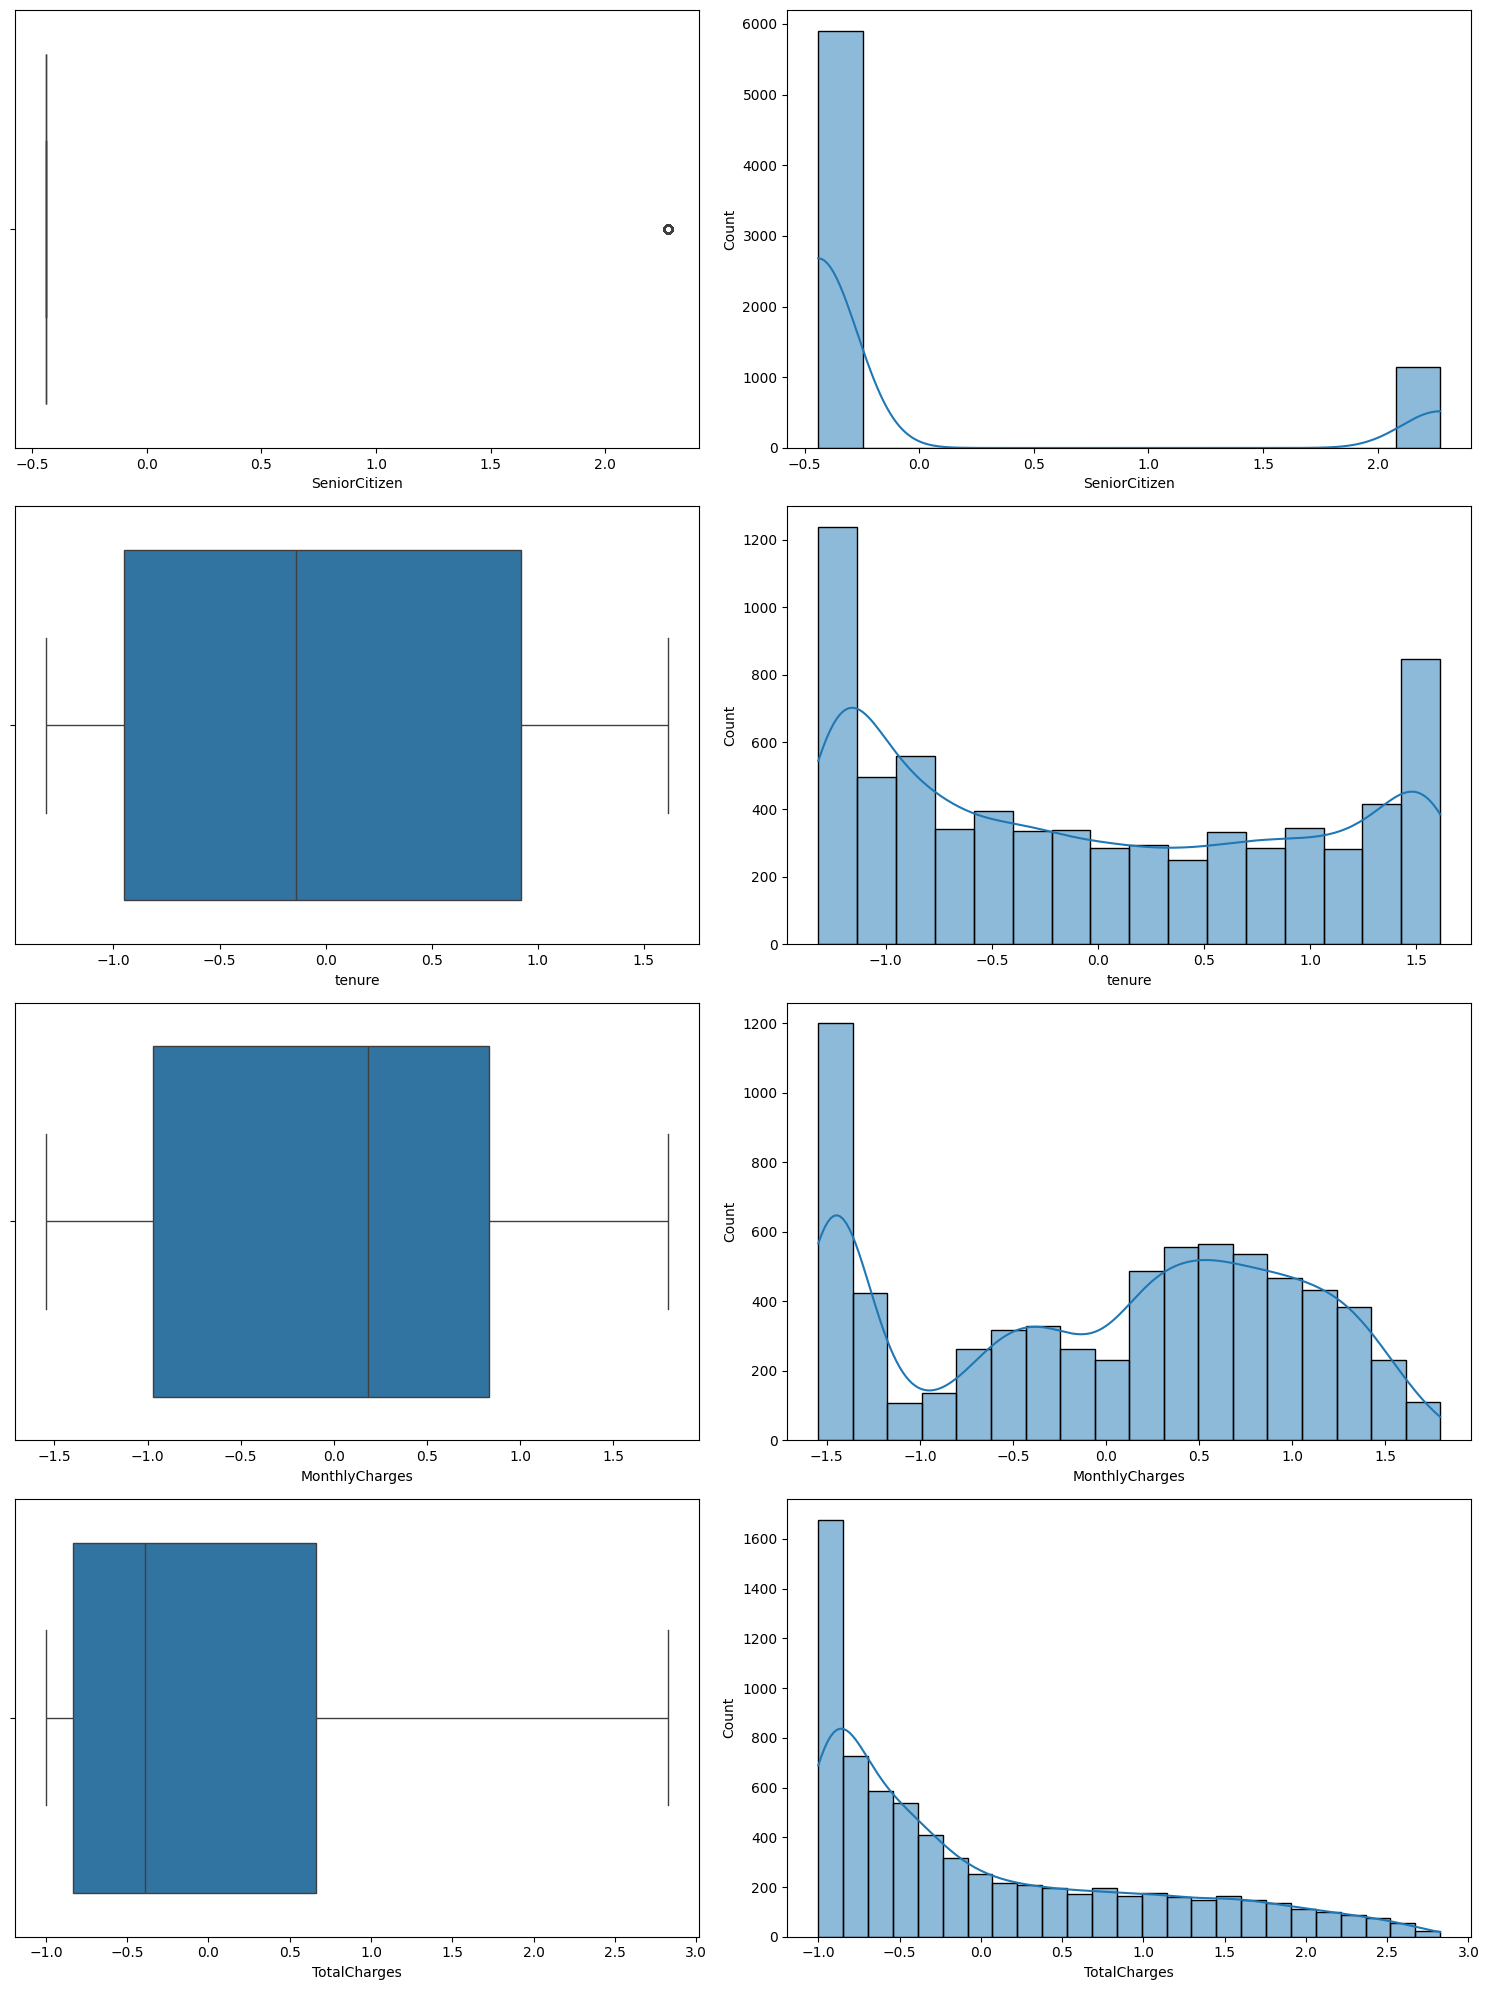

In [7]:
# Visualize distributions of numeric columns
fig, ax = plt.subplots(len(numeric_columns), 2, figsize=(15, len(numeric_columns) * 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=ax[i, 0])
    sns.histplot(data=df, x=col, kde=True, ax=ax[i, 1])
plt.tight_layout()

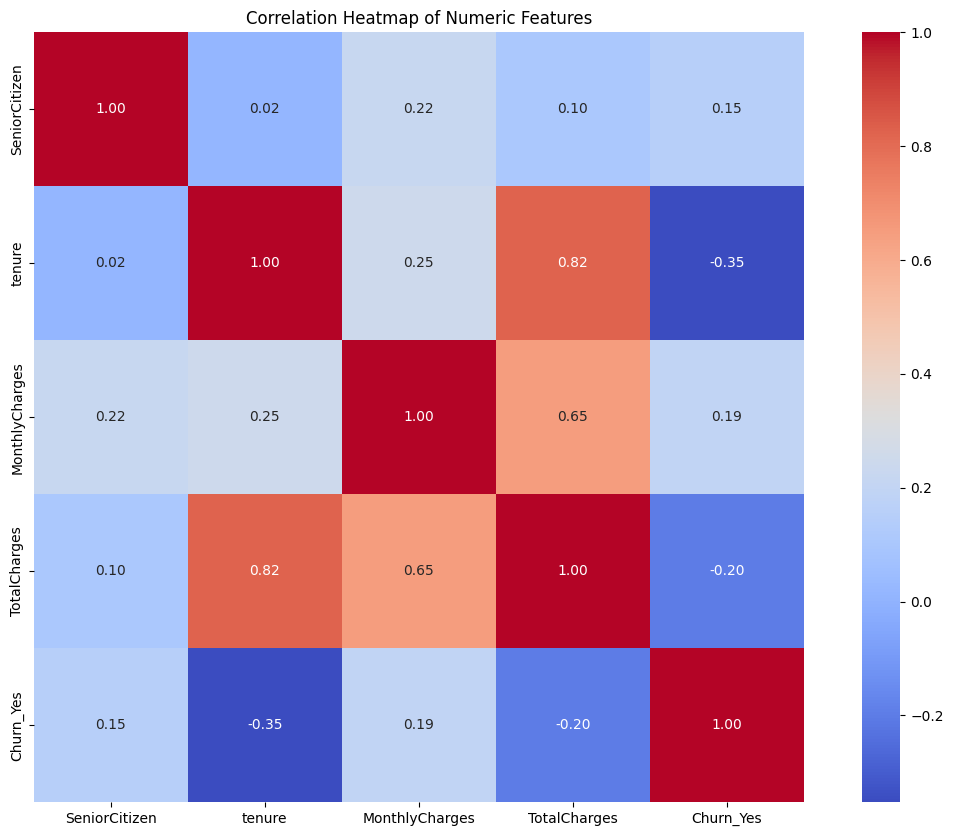

In [8]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Ensure the target variable is included in the numeric columns (adjust the target variable name accordingly)
if 'Churn_Yes' not in numeric_cols:
    numeric_cols = numeric_cols.append(pd.Index(['Churn_Yes']))

# Calculate correlation only for numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### Step 7: Perform Exploratory Data Analysis 
- Visualize distributions of numeric columns using boxplots and histograms.
- Generate a correlation heatmap to identify relationships between features and the target variable.

## Step 8 
#### Prepare and split the data for model training

In [9]:
# Preperation before model training
from sklearn.model_selection import train_test_split

# Define target (y) and features (X)
X = df.drop('Churn_Yes', axis=1)  # Adjusting to your dataset
y = df['Churn_Yes']

# Step 1: Split into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Further split the testing set into validation and testing sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes to ensure splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4930, 7072) (4930,)
Validation set shape: (1056, 7072) (1056,)
Testing set shape: (1057, 7072) (1057,)


## Step 9 - Modeling 
### Baseline Logistic Regression (Model 1)

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87       761
        True       0.69      0.58      0.63       296

    accuracy                           0.81      1057
   macro avg       0.77      0.74      0.75      1057
weighted avg       0.80      0.81      0.80      1057

ROC AUC Score: 0.8574532975814184
Logistic Regression MCC: 0.5049


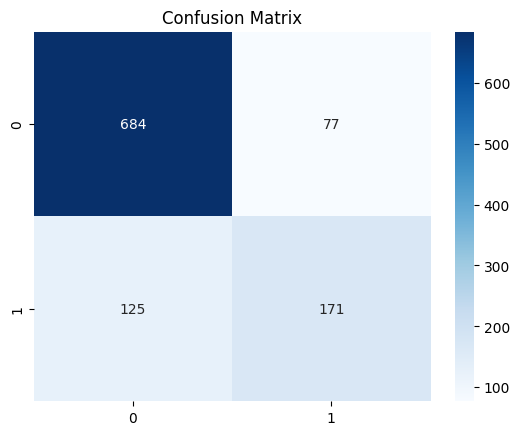

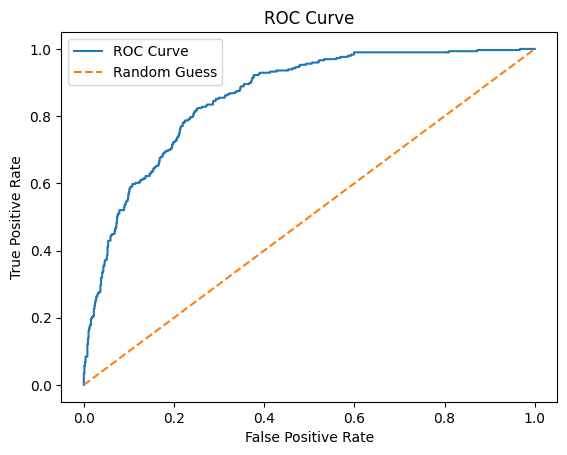

Average ROC AUC Score from K-Fold CV: 0.8458649523863615


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize Logistic Regression Model
clf = LogisticRegression(random_state=42, max_iter=500)

# Train Logistic Regression
clf.fit(X_train, y_train)

# Predictions on test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

from sklearn.metrics import matthews_corrcoef

# After predictions are made
logreg_y_pred = clf.predict(X_test)

# Calculate MCC
mcc_logreg = matthews_corrcoef(y_test, logreg_y_pred)
print(f"Logistic Regression MCC: {mcc_logreg:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_list = []

for train_index, test_index in kf.split(X):
    X_ktrain, X_ktest = X.iloc[train_index], X.iloc[test_index]
    y_ktrain, y_ktest = y.iloc[train_index], y.iloc[test_index]

    # Train on each fold
    clf.fit(X_ktrain, y_ktrain)
    y_kpred = clf.predict(X_ktest)
    y_kproba = clf.predict_proba(X_ktest)[:, 1]

    # Evaluate ROC AUC
    fold_roc_auc = roc_auc_score(y_ktest, y_kproba)
    roc_auc_list.append(fold_roc_auc)

# Average ROC AUC Score
print("Average ROC AUC Score from K-Fold CV:", np.mean(roc_auc_list))


## Step 10 - Modeling 
### Random Forest Model (Model 2)
- In this step, we train a basic Random Forest model with balanced class weights to handle class imbalance. The model is evaluated on the test set using standard metrics: precision, recall, F1-score, accuracy, and ROC-AUC. Visualizations include a confusion matrix and ROC curve.

Fold 1...
AUC Score: 0.8143
              precision    recall  f1-score   support

       False       0.90      0.68      0.77       727
        True       0.46      0.79      0.59       259

    accuracy                           0.71       986
   macro avg       0.68      0.73      0.68       986
weighted avg       0.79      0.71      0.72       986

[[491 236]
 [ 54 205]]
Fold 2...
AUC Score: 0.8461
              precision    recall  f1-score   support

       False       0.92      0.70      0.79       727
        True       0.50      0.83      0.62       259

    accuracy                           0.73       986
   macro avg       0.71      0.76      0.71       986
weighted avg       0.81      0.73      0.75       986

[[508 219]
 [ 44 215]]
Fold 3...
AUC Score: 0.8014
              precision    recall  f1-score   support

       False       0.90      0.65      0.75       727
        True       0.44      0.80      0.57       259

    accuracy                           0.69       98

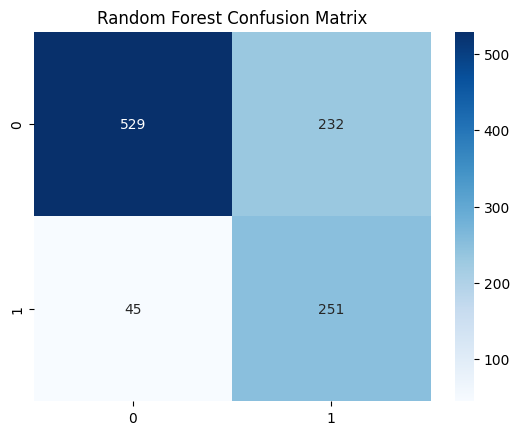

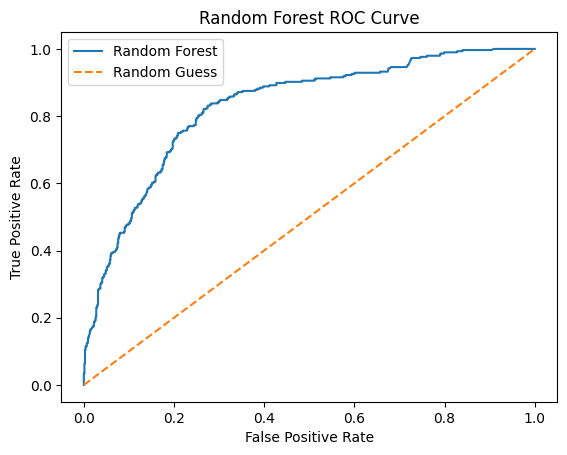

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    auc,
    accuracy_score,
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Initialize k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_auc_scores = []
rf_classification_reports = []
rf_confusion_matrices = []

# Start cross-validation loop
fold = 1
for train_index, test_index in kf.split(X_train, y_train):
    print(f"Fold {fold}...")
    fold += 1

    # Split the data
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Initialize Random Forest model
    rf_clf = RandomForestClassifier(
        random_state=42, n_estimators=100, max_depth=10, class_weight="balanced"
    )
    
    # Train the model
    start_time = time.time()
    rf_clf.fit(X_train_fold, y_train_fold)
    training_time = time.time() - start_time

    # Predictions
    rf_y_pred = rf_clf.predict(X_test_fold)
    rf_y_proba = rf_clf.predict_proba(X_test_fold)[:, 1]

    # Metrics
    auc_score = roc_auc_score(y_test_fold, rf_y_proba)
    rf_auc_scores.append(auc_score)

    classification_rep = classification_report(y_test_fold, rf_y_pred)
    rf_classification_reports.append(classification_rep)

    conf_matrix = confusion_matrix(y_test_fold, rf_y_pred)
    rf_confusion_matrices.append(conf_matrix)

    print(f"AUC Score: {auc_score:.4f}")
    print(classification_rep)
    print(conf_matrix)

# Aggregate results
print(f"\nAverage AUC Score across folds: {np.mean(rf_auc_scores):.4f}")

# Final evaluation on the full validation set
print("\nFinal Evaluation on the Full Validation Set:")

# Train the Random Forest model on the entire training data
rf_clf_final = RandomForestClassifier(
    random_state=42, n_estimators=100, max_depth=10, class_weight="balanced"
)
rf_clf_final.fit(X_train, y_train)

# Predictions on the test set
rf_y_pred = rf_clf_final.predict(X_test)
rf_y_proba = rf_clf_final.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

roc_auc = roc_auc_score(y_test, rf_y_proba)
print(f"Random Forest ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_y_proba)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()


### Hyperparameter Tuning with RandomizedSearchCV

RandomizedSearchCV is used to tune the Random Forest hyperparameters. This method searches over a defined grid of hyperparameters, testing random combinations for efficient tuning. Key parameters include:

- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of each tree.
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples required to be a leaf node.
- `max_features`: Number of features considered for splitting.
  - `'sqrt'`: Uses the square root of the number of features.
  - `'log2'`: Uses the base-2 logarithm of the number of features.

After identifying the best parameters, the model is retrained and evaluated.

- **Note:** RandomizedSearchCV was chosen for faster performance while still exploring a range of hyperparameter combinations. This provides a balance between computational efficiency and model optimization.

### Results:
The `random_state` ensures reproducibility of the tuning process, allowing consistent results when the notebook is re-run. The best parameters identified will be used to fine-tune the Random Forest model for further evaluation.


In [12]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", random_search.best_params_)
rf_clf_tuned = random_search.best_estimator_

# Evaluate tuned model
rf_y_pred_tuned = rf_clf_tuned.predict(X_test)
rf_y_proba_tuned = rf_clf_tuned.predict_proba(X_test)[:, 1]

print("Classification Report (Tuned):\n", classification_report(y_test, rf_y_pred_tuned))
print("ROC AUC Score (Tuned):", roc_auc_score(y_test, rf_y_proba_tuned))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Classification Report (Tuned):
               precision    recall  f1-score   support

       False       0.85      0.85      0.85       761
        True       0.61      0.62      0.62       296

    accuracy                           0.78      1057
   macro avg       0.73      0.73      0.73      1057
weighted avg       0.78      0.78      0.78      1057

ROC AUC Score (Tuned): 0.846208314095962


### Addressing Class Imbalance with SMOTE
The Synthetic Minority Oversampling Technique (SMOTE) is applied to address class imbalance. SMOTE generates synthetic samples for the minority class to create a balanced dataset. The Random Forest model is retrained using this balanced dataset and evaluated for improvements in metrics.

In [13]:
# Rebalancing Classes with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Random Forest with balanced data
rf_clf_smote = RandomForestClassifier(
    random_state=42, n_estimators=200, max_depth=20, class_weight=None
)
rf_clf_smote.fit(X_train_balanced, y_train_balanced)

# Evaluate SMOTE-based model
rf_y_pred_smote = rf_clf_smote.predict(X_test)
rf_y_proba_smote = rf_clf_smote.predict_proba(X_test)[:, 1]
print("Classification Report (SMOTE):\n", classification_report(y_test, rf_y_pred_smote))
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, rf_y_proba_smote))


Classification Report (SMOTE):
               precision    recall  f1-score   support

       False       0.91      0.75      0.82       761
        True       0.55      0.80      0.65       296

    accuracy                           0.76      1057
   macro avg       0.73      0.78      0.74      1057
weighted avg       0.81      0.76      0.77      1057

ROC AUC Score (SMOTE): 0.8405014738786092


### Feature Importance Analysis
Feature importance helps identify the most influential features in the Random Forest model. The top 10 features are visualized to provide insights into which variables contribute the most to churn prediction.

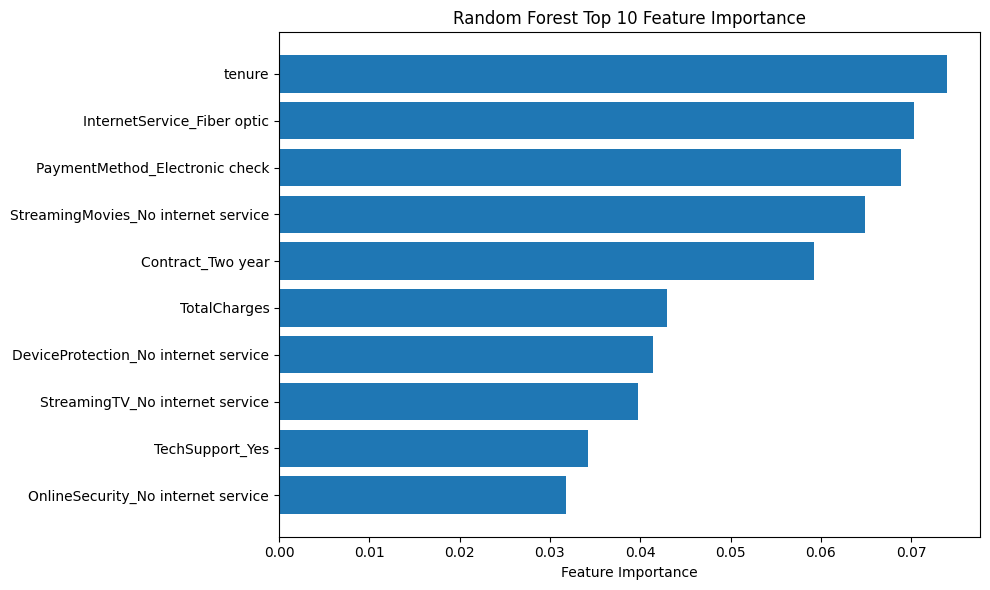

In [14]:
# Feature Importance Analysis
import matplotlib.pyplot as plt

# Get feature importances and corresponding feature names
importances = rf_clf.feature_importances_
feature_names = X.columns

# Sort features by importance (descending order)
sorted_idx = importances.argsort()[::-1]

# Display only the top 10 most important features
top_n = 10
top_features = sorted_idx[:top_n]
top_importances = importances[top_features]
top_feature_names = [feature_names[i] for i in top_features]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), top_feature_names, rotation=0)
plt.xlabel("Feature Importance")
plt.title("Random Forest Top 10 Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.tight_layout()
plt.show()


### Adjusting the Decision Threshold 
The default threshold of 0.5 for classification may not always align with business goals. In this step:
1. The Precision-Recall curve is plotted to evaluate the tradeoff between precision and recall.
2. A new threshold (0.6) is selected based on the curve or business needs.
3. Metrics are recalculated with the adjusted threshold, and the results are compared to the base model.

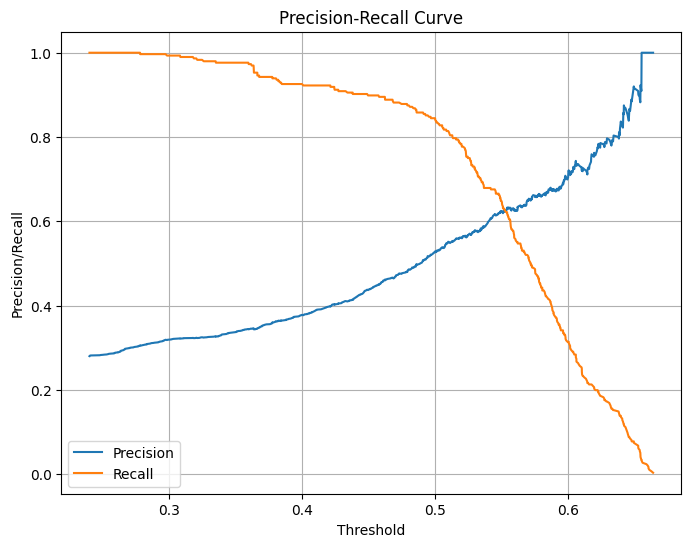

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

       False       0.78      0.95      0.86       761
        True       0.70      0.31      0.43       296

    accuracy                           0.77      1057
   macro avg       0.74      0.63      0.65      1057
weighted avg       0.76      0.77      0.74      1057

Confusion Matrix with Adjusted Threshold:
 [[722  39]
 [203  93]]


In [15]:
# Adjust Decision Threshold for Random Forest
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
rf_y_proba = rf_clf.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, rf_y_proba)

# Plot Precision-Recall Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# Choose a threshold for optimal tradeoff (e.g., at a knee point in the curve)
optimal_threshold = 0.6  # To prioritize recall
rf_y_pred_adjusted = (rf_y_proba >= optimal_threshold).astype(int)

# Evaluate metrics with the adjusted threshold
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, rf_y_pred_adjusted))
print("Confusion Matrix with Adjusted Threshold:\n", confusion_matrix(y_test, rf_y_pred_adjusted))


In [16]:
# Baseline metrics at default threshold (0.5)
baseline_metrics = classification_report(y_test, rf_y_pred, output_dict=True)

# Adjusted metrics at threshold 0.6
adjusted_metrics = classification_report(y_test, rf_y_pred_adjusted, output_dict=True)

# Compare key metrics
print("Comparison of Metrics Before and After Threshold Adjustment:")
for metric in ['precision', 'recall', 'f1-score']:
    print(f"{metric.capitalize()} (True Class):")
    print(f"  Default Threshold (0.5): {baseline_metrics['True'][metric]:.2f}")
    print(f"  Adjusted Threshold (0.6): {adjusted_metrics['True'][metric]:.2f}")
    print()

Comparison of Metrics Before and After Threshold Adjustment:
Precision (True Class):
  Default Threshold (0.5): 0.52
  Adjusted Threshold (0.6): 0.70

Recall (True Class):
  Default Threshold (0.5): 0.85
  Adjusted Threshold (0.6): 0.31

F1-score (True Class):
  Default Threshold (0.5): 0.64
  Adjusted Threshold (0.6): 0.43



### Comparison of Metrics Before and After Threshold Adjustment

The table below compares key metrics (precision, recall, and F1-score) for the true class, both before and after adjusting the decision threshold.

| Metric         | Default Threshold (0.5) | Adjusted Threshold (0.6) |
|----------------|--------------------------|--------------------------|
| Precision      | 0.52                    | 0.70                    |
| Recall         | 0.85                    | 0.31                    |
| F1-score       | 0.64                    | 0.43                    |

**Note**: Adjusting the threshold improves precision but reduces recall, reflecting the trade-off inherent in such adjustments.

### Final Cross-Validation and Evaluation - Model Evaluation
- After identifying the optimal hyperparameters using RandomizedSearchCV, the Random Forest model was retrained on the entire training dataset. 
- The model's performance was evaluated on the test dataset, and the final metrics are compared with those obtained during cross-validation. 
- This ensures a comprehensive assessment of the model's generalization performance.


In [17]:
# Refit the Random Forest model with the best parameters on the entire training set
rf_final_model = RandomForestClassifier(
    random_state=42,
    **random_search.best_params_,  # Unpack the best parameters
    class_weight="balanced"  # Ensure class imbalance is handled
)

# Fit the model to the full training data
rf_final_model.fit(X_train, y_train)

# Predict on the test set
rf_final_pred = rf_final_model.predict(X_test)
rf_final_proba = rf_final_model.predict_proba(X_test)[:, 1]

# Evaluate the final model
print("Final Evaluation Results on Test Data:")
print(classification_report(y_test, rf_final_pred))
print(f"Final ROC AUC Score: {roc_auc_score(y_test, rf_final_proba):.4f}")

Final Evaluation Results on Test Data:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85       761
        True       0.61      0.62      0.62       296

    accuracy                           0.78      1057
   macro avg       0.73      0.73      0.73      1057
weighted avg       0.78      0.78      0.78      1057

Final ROC AUC Score: 0.8462


In [18]:
print(f"Cross-Validation ROC AUC: {random_search.best_score_:.4f}")
print(f"Final Test ROC AUC: {roc_auc_score(y_test, rf_final_proba):.4f}")

Cross-Validation ROC AUC: 0.8360
Final Test ROC AUC: 0.8462


## Step 11 - Modeling
### Gradient Boosting (LightGBM Model) (Model 3)

In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# Train LightGBM model with updated parameters
lgb_clf = LGBMClassifier(
    random_state=42,
    n_estimators=150,  # Increased for more robust training
    learning_rate=0.05,  # Reduced for slower, better convergence
    max_depth=10,  # Kept the same based on initial tuning
    scale_pos_weight=12.27  # Adjusted based on class imbalance ratio
)

# Perform 5-fold CV with ROC-AUC scoring
cv_scores = cross_val_score(lgb_clf, X_train, y_train, cv=5, scoring="roc_auc")
print(f"LightGBM CV ROC-AUC Scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f}")

# Train the LightGBM model on the full training data
lgb_clf.fit(X_train, y_train)

# Predictions
lgb_y_pred = lgb_clf.predict(X_test)
lgb_y_proba = lgb_clf.predict_proba(X_test)[:, 1]

# MCC for LightGBM
mcc_lightgbm = matthews_corrcoef(y_test, lgb_y_pred)
print(f"LightGBM MCC: {mcc_lightgbm:.4f}")

# Evaluate the Model
print("Updated LightGBM Classification Report:")
print(classification_report(y_test, lgb_y_pred))
print(f"Updated LightGBM ROC AUC Score: {roc_auc_score(y_test, lgb_y_proba):.4f}")

# Confusion Matrix
lgb_conf_matrix = confusion_matrix(y_test, lgb_y_pred)
sns.heatmap(lgb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.show()

# ROC Curve
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_y_proba)
plt.plot(lgb_fpr, lgb_tpr, label="LightGBM")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LightGBM ROC Curve")
plt.legend()
plt.show()

NameError: name 'cross_val_score' is not defined

## Step 12 - Modeling 
### Voting Classifier (Model 4)

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import matthews_corrcoef

# Updated Voting Classifier with refined weights
ensemble = VotingClassifier(
    estimators=[
        ("logistic", clf),  # Logistic Regression
        ("random_forest", rf_clf),  # Random Forest
        ("lightgbm", lgb_clf)  # Updated LightGBM
    ],
    voting="soft",  # Use probabilities for soft voting
    weights=[1, 2, 4]  # Adjust weights based on individual performance
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predictions and Evaluation
ensemble_y_pred = ensemble.predict(X_test)
ensemble_y_proba = ensemble.predict_proba(X_test)[:, 1]

# MCC for Voting Classifier
mcc_ensemble = matthews_corrcoef(y_test, ensemble_y_pred)
print(f"Voting Classifier MCC: {mcc_ensemble:.4f}")

# Evaluate the Ensemble Model
print("Updated Ensemble Classification Report:")
print(classification_report(y_test, ensemble_y_pred))
print(f"Updated Ensemble ROC AUC Score: {roc_auc_score(y_test, ensemble_y_proba):.4f}")


c:\Users\yanks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
Voting Classifier MCC: 0.4631
Updated Ensemble Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.63      0.75       761
        True       0.48      0.89      0.62       296

    accuracy                           0.70      1057
   macro avg       0.71      0.76      0.69      1057
weighted avg       0.81 

## End Findings

In [23]:
import pandas as pd

# Define metrics for each model
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "LightGBM", "Voting Classifier"],
    "Accuracy": [0.81, 0.78, 0.67, 0.70],
    "Precision (True)": [0.69, 0.61, 0.46, 0.48],
    "Recall (True)": [0.58, 0.62, 0.91, 0.89],
    "F1-Score (True)": [0.63, 0.62, 0.61, 0.62],
    "ROC AUC": [0.8459, 0.8462, 0.8380, 0.8459],
    "MCC": [0.50, 0.43, 0.45, 0.46], 
}

# Create a DataFrame
comparison_df = pd.DataFrame(metrics)

# Display the DataFrame
print(comparison_df)

                 Model  Accuracy  Precision (True)  Recall (True)  \
0  Logistic Regression      0.81              0.69           0.58   
1        Random Forest      0.78              0.61           0.62   
2             LightGBM      0.67              0.46           0.91   
3    Voting Classifier      0.70              0.48           0.89   

   F1-Score (True)  ROC AUC   MCC  
0             0.63   0.8459  0.50  
1             0.62   0.8462  0.43  
2             0.61   0.8380  0.45  
3             0.62   0.8459  0.46  


In [24]:
comparison_df.to_csv("model_comparison.csv", index=False)
print("Comparison saved to 'model_comparison.csv'")

Comparison saved to 'model_comparison.csv'


In [25]:
from IPython.display import display

display(comparison_df)

,Model,Accuracy,Precision (True),Recall (True),F1-Score (True),ROC AUC,MCC
0,Logistic Regression,0.81,0.69,0.58,0.63,0.8459,0.50
1,Random Forest,0.78,0.61,0.62,0.62,0.8462,0.43
2,LightGBM,0.67,0.46,0.91,0.61,0.8380,0.45
3,Voting Classifier,0.70,0.48,0.89,0.62,0.8459,0.46


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098


c:\Users\yanks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098


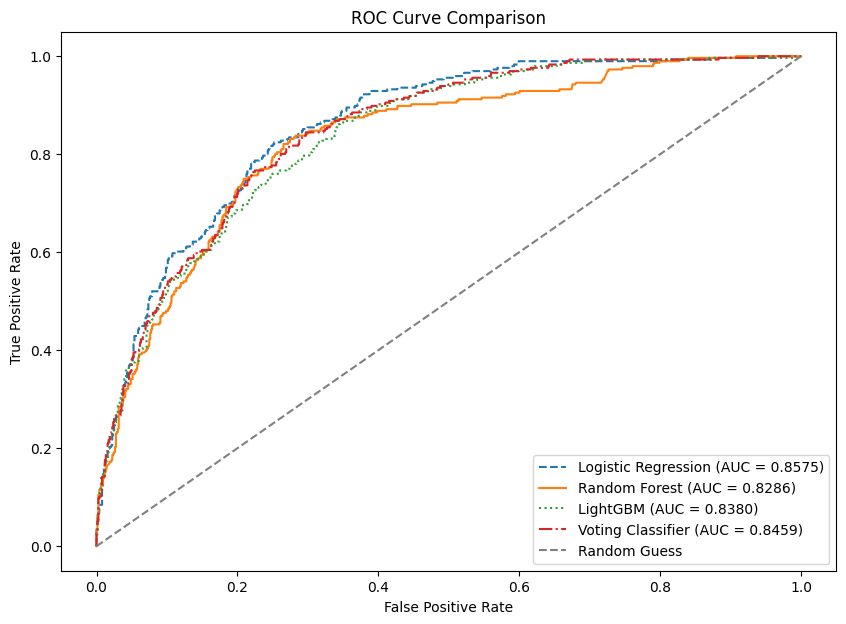

In [26]:
# Ensure models are trained before this step
# Logistic Regression
clf.fit(X_train, y_train)

# Random Forest
rf_clf.fit(X_train, y_train)

# LightGBM
lgb_clf.fit(X_train, y_train)

# Voting Classifier
ensemble.fit(X_train, y_train)

# Generate ROC curve data for each model
fpr_log, tpr_log, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])  # Logistic Regression
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])  # Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_clf.predict_proba(X_test)[:, 1])  # LightGBM
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble.predict_proba(X_test)[:, 1])  # Voting Classifier
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.4f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC = {roc_auc_lgb:.4f})", linestyle=':')
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Voting Classifier (AUC = {roc_auc_ensemble:.4f})", linestyle='-.')

# Add diagonal line for random guess
plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


### Model Evaluation and Final Selection
### Overview
- The goal of this project was to build and evaluate three classification models to determine the best-performing one for predicting customer churn. 
- The evaluation was based on standard metrics such as accuracy, recall, precision, F1-score, ROC-AUC, and MCC.

### Model Comparison

The table below summarizes the performance of the three models:

| Model             | Accuracy | Precision (True) | Recall (True) | F1-Score (True) | ROC AUC  | MCC   |
|-------------------|----------|------------------|---------------|-----------------|----------|-------|
| Logistic Regression | 0.81   | 0.69             | 0.58          | 0.63            | 0.8459   | 0.50  |
| Random Forest     | 0.78     | 0.61             | 0.62          | 0.62            | 0.8462   | 0.43  |
| LightGBM          | 0.67     | 0.46             | 0.91          | 0.61            | 0.8380   | 0.45  |
| Voting Classifier | 0.70     | 0.48             | 0.89          | 0.62            | 0.8459   | 0.46  |

### Metric Selection
- Primary Metric: ROC-AUC was selected as the primary metric because of its ability to measure the overall performance of the models in handling class imbalance, which is critical for predicting churn.
- Additional Metric: MCC was considered for its balanced evaluation of both classes, aligning with the business goal of minimizing false negatives and false positives.



### Findings
### **Best Model: Logistic Regression**. 

Logistic Regression: 
- Achieved the highest accuracy (0.81) among all models.
- Demonstrated a high precision (0.69), reducing false positives effectively.
- Moderate recall (0.58), indicating that it missed some churned customers.
- MCC value of 0.50 shows a balanced prediction for both classes.
- Overall, suitable for scenarios where precision is more critical than recall, such as minimizing incorrect churn predictions.

Random Forest:
- Achieved the second-highest accuracy (0.78) but had moderate recall (0.62).
- May underperform in identifying churned customers compared to models with higher recall.
- MCC value of 0.43 indicates balanced performance.

LightGBM:
- Showed the best recall (0.91), effectively identifying the most churned customers.
- Slightly lower ROC-AUC (0.8380) compared to the Random Forest and Voting Classifier.
- MCC value of 0.45 indicates strong handling of class imbalance.

Voting Classifier:
- Balanced performance across all metrics.
- Achieved the highest MCC (0.46), indicating robust predictions for both classes.
- Comparable ROC-AUC to Logistic Regression and Random Forest, making it a strong candidate for generalizable performance.